<a href="https://colab.research.google.com/github/nakatoconstance/nakatoconstance/blob/main/MDR_FULLDATASET_submitted_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the data
from google.colab import files
uploaded = files.upload()
np.random.seed(0)


Saving MUST_MDR_DATA_final.csv to MUST_MDR_DATA_final.csv


In [3]:
data = pd.read_csv("MUST_MDR_DATA_final.csv", encoding='latin-1',low_memory=False)
data.head()

,Identification number,Specimen number,Organism,Country,Laboratory,Origin,Last name,First name,Sex,Date of Birth,...,DOX_ND30,LNZ_ND30,MEM_ND10,MET_ND5,PIP_ND100,CCV_ND30,NOV_ND5,FOX_ND10,PEF_ND10,NOR_ND5
0,O-0179,NaN,NaN,UGA,DMM,h,KABIKIIRA,FLORENCE,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O-0180,NaN,NaN,UGA,DMM,h,TUMUHIMBISE,DEUS,m,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O-0181,NaN,NaN,UGA,DMM,h,KYAHANGIRWE,BETETH,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,O-0182,NaN,NaN,UGA,DMM,h,LUBEGA,SAMUEL,m,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,O-0170,NaN,NaN,UGA,DMM,h,NAKUNDA,ANNITAH,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(data.columns)

Index(['Identification number', 'Specimen number', 'Organism', 'Country',
       'Laboratory', 'Origin', 'Last name', 'First name', 'Sex',
       'Date of Birth', 'Age', 'Age category', 'Location', 'Institution',
       'Department', 'Location type', 'Date of admission', 'Specimen date',
       'Specimen type', 'Specimen type (Numeric)', 'Reason', 'Isolate number',
       'Organism type', 'Serotype', 'Date of data entry',
       'Hospitalised for more than 48hrs at specimen collection time',
       'Patient transferred from another facility?',
       'Prior antibiotic therapy', 'AMX_ND25', 'AMC_ND20', 'AMK_ND30',
       'AMP_ND10', 'AZM_ND15', 'FEP_ND30', 'BAC_ND10', 'CRO_ND30', 'CXM_ND30',
       'CIP_ND5', 'OXA_ND1', 'CHL_ND30', 'CZO_ND30', 'CLI_ND2', 'GEN_ND10',
       'GEH_ND120', 'ERY_ND15', 'TCY_ND30', 'RIF_ND5', 'SAM_ND10', 'OFX_ND5',
       'SXT_ND12', 'TOB_ND10', 'OPT_ND5', 'MFX_ND5', 'VAN_ND30', 'PEN_ND10',
       'NAL_ND30', 'IPM_ND10', 'CAC_ND30', 'CAZ_ND30', 'LVX_ND5', 'NI

In [5]:
print(data['Organism'].unique())

[nan 'spn' 'xxx' 'eco' 'kl-' 'sau' 'mor' 'pr-' 'ps-' 'en-' 'sgc' 'can'
 'ent' 'str' 'sal' 'ci-' 'ac-' 'eae' 'con' 'sta' 'sat' 'kpn' 'cdi' 'spy'
 'eag' 'afs' 'pae' 'xsg' 'xpa' 'scn' 'esc' 'cal' 'efa' 'gm-' 'pmi' 'fun'
 'shi' 'prv' 'cfr' 'afl' 'pen' 'kox' 'yea' 'aba' 'acr' 'ngo' 'ani' 'mmo'
 'tn' 'nas' 'ecl' 'gnr' 'sc+' 'kl' 'sgm' 'koz' '157' 'nfr' 'cne' 'cdp'
 'nor' 'bsa' 'pvu' 'bsl' 'ne-' 'hhe' 'sma' 'oth' 'xx' 'afb' 'sai' 'caj'
 'cmv' 'asp' 'cry' 'ha-' 'XXX' 'cdt' 'sep' 'bl' 'ssa']


In [6]:
import pandas as pd

# Replacement dictionary for organism abbreviations
organism_replacements = {
    'nfr': 'Neisseria meningitidis',
    'spn': 'Streptococcus species', #pneumoniae'
    'eco': 'Escherichia coli',
    'kl-': 'Klebsiella species',
    'sau': 'Staphylococcus aureus',
    'mor': 'Moraxella catarrhalis',
    'pr-': 'Providencia species',
    'ps-': 'Pseudomonas species',
    'en-': 'Enterobacter species',
    'sgc': 'Serratia species',
    'can': 'Candida species',
    'ent': 'Enterococcus species',
    'str': 'Streptococcus species',
    'sal': 'Salmonella species',
    'ci-': 'Citrobacter species',
    'ac-': 'Acinetobacter species',
    'eae': 'Escherichia coli',#Enteroaggregative Escherichia coli
    'con': 'Clostridium species',
    'sta': 'Staphylococcus aureus',
    'sat': 'Sarcina species',
    'kpn': 'Klebsiella species',#Klebsiella pneumoniae
    'cdi': 'Clostridium difficile',
    'spy': 'Streptococcus species',#pyogenes
    'eag': 'Escherichia coli',#(enteropathogenic)
    'afs': 'Aspergillus species',
    'pae': 'Pseudomonas species',#aeruginosa
    'xsg': 'Xanthomonas species',
    'xpa': 'Xanthomonas phaseoli',
    'scn': 'Streptococcus species',#Streptococcus mitis
    'esc': 'Escherichia coli',#(enterotoxigenic)
    'cal': 'Candida species',#albicans',
    'efa': 'Enterococcus species',#faecalis',
    'gm-': 'Gram-negative bacteria',
    'pmi': 'Pseudomonas species',#mallei',
    'fun': 'Fungal species',
    'shi': 'Shigella species',
    'prv': 'Providencia species',#vulgaris',
    'cfr': 'Corynebacterium species',
    'afl': 'Aspergillus flavus',
    'pen': 'Penicillium species',
    'kox': 'Klebsiella species', #Klebsiella oxytoca
    'yea': 'Yeast',
    'aba': 'Acinetobacter species',#Acinetobacter baumannii
    'acr': 'Acinetobacter species',
    'ngo': 'Neisseria gonorrhoeae',
    'ani': 'Anisakis species',
    'mmo': 'Mycobacterium marinum',
    'tn': 'Treponema species',
    'nas': 'Nasal flora',
    'ecl': 'Escherichia coli',#(enterohemorrhagic)
    'gnr': 'Gram-negative rods',
    'sc+': 'Streptococcus species',#Streptococcus agalactiae',
    'kl': 'Klebsiella species',
    'sgm': 'Streptococcus species',#Streptococcus gallolyticus',
    'koz': 'Kocuria species',
    '157': 'Escherichia coli',#O157:H7
    'cne': 'Citrobacter nepaulensis',
    'cdp': 'Campylobacter species',
    'nor': 'Norovirus',
    'bsa': 'Bacillus subtilis',
    'pvu': 'Pseudomonas vulgaris',
    'bsl': 'Bacillus cereus',
    'ne-': 'Neisseria species',
    'hhe': 'Haemophilus influenzae',
    'sma': 'Streptococcus species',#Streptococcus mitis
    'oth': 'Other pathogens',
    'xx': 'Unknown organism',
    'afb': 'Acinetobacter species',
    'sai': 'Salmonella infantis',
    'caj': 'Corynebacterium jeikeium',
    'cmv': 'Cytomegalovirus',
    'asp': 'Aspergillus species',
    'cry': 'Cryptococcus neoformans',
    'ha-': 'Helicobacter species',
    'XXX': 'Unknown organism',
    'cdt': 'Corynebacterium diphtheriae',
    'sep': 'Sepsis',
    'bl': 'Brucella species',#Not sure about this one
    'ssa': 'Streptococcus species',#'Streptococcus salivarius'
    # Add any additional organisms as needed
}
#update organisms
data['Organism'] = data['Organism'].replace(organism_replacements)


In [7]:
#print unique organisms
print(data['Organism'].unique())
# Get the total number of unique organisms
num_unique_organisms = data['Organism'].nunique()

# Print the total number
print("Total number of unique organisms:", num_unique_organisms)

[nan 'Streptococcus species' 'xxx' 'Escherichia coli' 'Klebsiella species'
 'Staphylococcus aureus' 'Moraxella catarrhalis' 'Providencia species'
 'Pseudomonas species' 'Enterobacter species' 'Serratia species'
 'Candida species' 'Enterococcus species' 'Salmonella species'
 'Citrobacter species' 'Acinetobacter species' 'Clostridium species'
 'Sarcina species' 'Clostridium difficile' 'Aspergillus species'
 'Xanthomonas species' 'Xanthomonas phaseoli' 'Gram-negative bacteria'
 'Fungal species' 'Shigella species' 'Corynebacterium species'
 'Aspergillus flavus' 'Penicillium species' 'Yeast'
 'Neisseria gonorrhoeae' 'Anisakis species' 'Mycobacterium marinum'
 'Treponema species' 'Nasal flora' 'Gram-negative rods' 'Kocuria species'
 'Neisseria meningitidis' 'Citrobacter nepaulensis'
 'Campylobacter species' 'Norovirus' 'Bacillus subtilis'
 'Pseudomonas vulgaris' 'Bacillus cereus' 'Neisseria species'
 'Haemophilus influenzae' 'Other pathogens' 'Unknown organism'
 'Salmonella infantis' 'Coryne

In [8]:
import pandas as pd

# Replacement dictionary for specimen types
specimen_type_replacements = {
    'Pus swab': 'Pus Swab',
    'pus swab': 'Pus Swab',
    'ps': 'Pus Swab',
    'wound swab': 'Wound Swab',
    'wd': 'Wound Swab',
    'Wound Swab': 'Wound Swab',  # Already standardized, but included for clarity
    'sw': 'Wound Swab',
    'Blood culture': 'Blood Culture',
    'blood': 'Blood Culture',
    'bl': 'Blood Culture',
    'urine': 'Urine',
    'Urine': 'Urine',  # Already standardized, but included for clarity
    'ur': 'Urine',
    'HVS': 'HVS',  # Already standardized, but included for clarity
    'vaginal swab ': 'HVS',
    'Vagina swab': 'HVS',
    'va': 'HVS',
    'Pleural fluid/aspirate': 'Pleural Fluid',
    'Pleural aspirate': 'Pleural Fluid',
    'Sputum': 'Sputum',  # Already standardized, but included for clarity
    'sp': 'Sputum',
    'Throat swab': 'Throat Swab',
    'throat swab': 'Throat Swab',
    'tracheal aspirate': 'Tracheal Aspirate',
    'ta': 'Tracheal Aspirate',
    'Pus': 'Pus Swab',
    'P/S': 'Pus Swab',
    'U/S': 'Urine',  # Assuming U/S stands for Urine Sample
    'Trecheal': 'Tracheal Aspirate',
    'W/S': 'Wound Swab',
    'Pleural eff': 'Pleural Fluid',
    'V/S': 'HVS',  # Assuming V/S stands for Vaginal Swab
    'P/A': 'Pleural Fluid',  # Assuming P/A stands for Pleural Aspirate
    'C/S': 'CSF',  # Assuming C/S stands for Cerebrospinal Fluid
    'T/A': 'Tracheal Aspirate',
    'E/S': 'Ear Swab',
    'PUS': 'Pus Swab',
    'S/F': 'Stool',  # Assuming S/F stands for Stool or Feces
    'K/A': 'Joint Aspirate',  # Assuming K/A stands for Knee Aspirate
    'G/A': 'Joint Aspirate',  # Assuming G/A stands for General Aspirate
    'Catheter': 'Urine',  # Assuming Catheter refers to Catheter Urine Sample
    'T/S': 'Throat Swab',
    'N/S': 'Naso pharyngeal swab',
    'B/S': 'Blood Culture',  # Assuming B/S stands for Blood Sample
    'LUNG ABCES': 'Sputum',  # Assuming Lung Abscess Sample is related to Sputum
    'kn': 'Joint Aspirate',  # Assuming kn refers to knee aspirate
    'ùr': 'Urine',
    'bi': 'Blood Culture',  # Assuming blood
    're': 'Urine',  # Assuming refers to Urine
    'sm': 'Sputum',  # Assuming refers to sputum
    'fl': 'Pleural Fluid',  # Assuming refers to pleural fluid
    'jf': 'Joint Aspirate',  # Assuming refers to joint fluid
    'fv': 'HVS',  # Assuming refers to Vaginal Swab
    'no': 'Naso pharyngeal swab',  # Assuming refers to Naso pharyngeal swab
    'pi': 'Pus Swab',  # Assuming refers to pus swab
    'uc': 'Urine',  # Assuming refers to Urine Culture
    'ln': 'Sputum',  # Assuming Lung Sample or Sputum
    'kf': 'Joint Aspirate',  # Assuming Knee fluid
    'en': 'Ear Swab',  # Assuming Ear swab
    'cy': 'Urine',  # Assuming Urine Cytology
    'ur.': 'Urine',
    'cs': 'CSF',
    'ce': 'CSF',  # Assuming refers to Cerebrospinal Fluid
    'bo': 'Blood Culture',  # Assuming refers to blood culture
    'fn': 'Pleural Fluid',  # Assuming refers to fluid from unknown source (pleural fluid is a common type)
    'nan': 'Unknown',  # Handle NaN values as 'Unknown'
    'sb': 'Blood Culture',  # Assuming 'sb' stands for blood sample
    'de': 'Wound Swab',  # Assuming 'de' stands for deep wound or debridement sample
    'sf': 'Stool',  # Assuming 'sf' stands for stool or feces sample
    'cx': 'Cervical Swab',  # Assuming 'cx' stands for cervical sample
    'at': 'Ascitic fluid/tap',  # Assuming 'at' stands for ascitic tap
    'ga': 'Joint Aspirate',  # Assuming 'ga' stands for general aspirate
    'ue': 'Urine',  # Assuming 'ue' stands for urine sample
    'st': 'Stool',  # Assuming 'st' stands for stool sample
    'ex': 'Sputum',  # Assuming 'ex' stands for expectorated sputum
    'ea': 'Ear Swab',  # Assuming 'ea' stands for ear swab
    'th': 'Throat Swab',  # Assuming 'th' stands for throat swab
    'pu': 'Pus Swab',  # Assuming 'pu' stands for pus swab
    'sk': 'Wound Swab',  # Assuming 'sk' stands for skin swab
    'pf': 'Pleural Fluid',  # Assuming 'pf' stands for pleural fluid
    'as': 'Ascitic fluid/tap',  # Assuming 'as' stands for ascitic fluid
    'cv': 'Blood Culture',  # Assuming 'cv' stands for central venous blood
    'ws': 'Wound Swab',  # Assuming 'ws' stands for wound swab
    'hvs': 'HVS',  # Assuming 'hvs' stands for high vaginal swab
    'sl': 'Sputum',  # Assuming 'sl' stands for saliva or sputum
    'pl': 'Pleural Fluid',  # Assuming 'pl' stands for pleural fluid
    'lu': 'Sputum',  # Assuming 'lu' stands for lung sample or sputum
    'pc': 'Urine',  # Assuming 'pc' stands for urine protein creatinine
    'tr': 'Tracheal Aspirate',  # Assuming 'tr' stands for tracheal aspirate
    'gf': 'Joint Aspirate',  # Assuming 'gf' stands for general fluid or joint fluid
    'ey': 'Eye Swab',  # Assuming 'ey' refers to eye swab
    'hv': 'HVS',  # Assuming 'hv' refers to High Vaginal Swab
    'pa': 'Pus Swab',  # Assuming 'pa' refers to Pus Aspirate
    'mo': 'Wound Swab',  # Assuming 'mo' refers to Mouth Swab or wound swab near the mouth
    'ac': 'Ascitic fluid/tap',  # Assuming 'ac' refers to Ascitic fluid
    'ab': 'Abdominal Fluid',  # Assuming 'ab' refers to Abdominal Fluid

}

# Apply replacements to the 'Specimen type' column
data['Specimen type'] = data['Specimen type'].replace(specimen_type_replacements)


In [9]:
import pandas as pd

# ... (Your code for loading data) ...

# Get unique specimen types
unique_specimen_types = data['Specimen type'].unique()

# Display unique specimen types
print("Unique Specimen Types:")
print(unique_specimen_types)

Unique Specimen Types:
['Urine' 'Pus Swab' 'HVS' 'Sputum' 'Stool' 'Wound Swab' 'Throat Swab'
 'Pleural Fluid' 'Ear Swab' 'Blood Culture' 'Abdominal Fluid' 'pd'
 'Tracheal Aspirate' nan 'bn' 'Ascitic fluid/tap' 'CSF' 'rp' 'sv' 'hp'
 'Naso pharyngeal swab' 'Joint Aspirate' 'si' 'penile pestula'
 'Cervical Swab' 'pg' 'ca' 'ch' 'Eye Swab' 'eo' 'ut' 'end' 'u/s' 'knee'
 'ti' 'bt' 'pm' 'mi' 'bm' 'sa' 'sputum' 'ha' 'bx' 'lx' 'pt' 'ng tube' 'cr'
 'bld' 'tracheal swab' 'csf' 'tracheal' 'eh' 'ec' 'bs' 'us' 'br' 'um' 'pe'
 'ft' 'la' 'nl' 'ul' 'gn' 'te']


In [10]:
import pandas as pd

print(data.columns)

# Print the unique values
#print(unique_specimen_types)

Index(['Identification number', 'Specimen number', 'Organism', 'Country',
       'Laboratory', 'Origin', 'Last name', 'First name', 'Sex',
       'Date of Birth', 'Age', 'Age category', 'Location', 'Institution',
       'Department', 'Location type', 'Date of admission', 'Specimen date',
       'Specimen type', 'Specimen type (Numeric)', 'Reason', 'Isolate number',
       'Organism type', 'Serotype', 'Date of data entry',
       'Hospitalised for more than 48hrs at specimen collection time',
       'Patient transferred from another facility?',
       'Prior antibiotic therapy', 'AMX_ND25', 'AMC_ND20', 'AMK_ND30',
       'AMP_ND10', 'AZM_ND15', 'FEP_ND30', 'BAC_ND10', 'CRO_ND30', 'CXM_ND30',
       'CIP_ND5', 'OXA_ND1', 'CHL_ND30', 'CZO_ND30', 'CLI_ND2', 'GEN_ND10',
       'GEH_ND120', 'ERY_ND15', 'TCY_ND30', 'RIF_ND5', 'SAM_ND10', 'OFX_ND5',
       'SXT_ND12', 'TOB_ND10', 'OPT_ND5', 'MFX_ND5', 'VAN_ND30', 'PEN_ND10',
       'NAL_ND30', 'IPM_ND10', 'CAC_ND30', 'CAZ_ND30', 'LVX_ND5', 'NI

In [14]:
#print unique organism type
print(data['Organism type'].unique())



[nan '+' 'o' '-' 'f']


In [15]:
# Define the column name replacements
column_name_mapping = {

    'AMX_ND25': 'Amoxicillin',
    'AMC_ND20': 'Amoxicillin/Clavulanic Acid',
    'AMK_ND30': 'Amikacin',
    'AMP_ND10': 'Ampicillin',
    'AZM_ND15': 'Azithromycin',
    'FEP_ND30': 'Cefepime',
    'BAC_ND10': 'Bacitracin',
    'CRO_ND30': 'Ceftriaxone',
    'CXM_ND30': 'Cefuroxime',
    'CIP_ND5': 'Ciprofloxacin',
    'OXA_ND1': 'Oxacillin',
    'CHL_ND30': 'Chloramphenicol',
    'CZO_ND30': 'Cefazolin',
    'CLI_ND2': 'Clindamycin',
    'GEN_ND10': 'Gentamicin',
    'GEH_ND120': 'Gentaheptose',
    'ERY_ND15': 'Erythromycin',
    'TCY_ND30': 'Tetracycline',
    'RIF_ND5': 'Rifampicin',
    'SAM_ND10': 'Ampicillin/Sulbactam',
    'OFX_ND5': 'Ofloxacin',
    'SXT_ND12': 'Sulfamethoxazole',  # corrected spelling
    'TOB_ND10': 'Tobramycin',
    'OPT_ND5': 'Optochin',
    'MFX_ND5': 'Moxifloxacin',
    'VAN_ND30': 'Vancomycin',
    'PEN_ND10': 'Penicillin',
    'NAL_ND30': 'Nalidixic Acid',
    'IPM_ND10': 'Imipenem',
    'CAC_ND30': 'Cefaclor',
    'CAZ_ND30': 'Ceftazidime',
    'LVX_ND5': 'Levofloxacin',
    'NIT_ND300': 'Nitrofurantoin',
    'CTC_ND30': 'Chlortetracycline',
    'CTX_ND30': 'Cefotaxime',
    'ATM_ND30': 'Aztreonam',
    'AZL_ND75': 'Azlocillin',
    'CFM_ND5': 'Cefixime',
    'FOX_ND30': 'Cefoxitin 30 mg',  # made unique
    'FOX_ND10': 'Cefoxitin 10 mg',  # made unique
    'DOX_ND30': 'Doxycycline',
    'LNZ_ND30': 'Linezolid',
    'MEM_ND10': 'Meropenem',
    'MET_ND5': 'Metronidazole',
    'PIP_ND100': 'Piperacillin',
    'CCV_ND30': 'Cefovecin',
    'NOV_ND5': 'Novobiocin',
    'PEF_ND10': 'Pefloxacin',
    'NOR_ND5': 'Norfloxacin'
}

# Get existing columns in the DataFrame
existing_columns = data.columns

# Filter the mapping to only include existing columns
filtered_mapping = {k: v for k, v in column_name_mapping.items() if k in existing_columns}

# Replace the column names
data = data.rename(columns=filtered_mapping)

In [16]:
#missing data
missing_data = data.isnull().sum()
print(missing_data)

Identification number        0
Specimen number          16473
Organism                   475
Country                      0
Laboratory                   0
                         ...  
Cefovecin                16360
Novobiocin               16468
Cefoxitin 10 mg          16465
Pefloxacin               16443
Norfloxacin              16458
Length: 77, dtype: int64


In [17]:
#droping missing organisms
data = data.dropna(subset=['Organism'])

In [18]:
#check total number of records
print(len(data))

15998


In [19]:
# Check the unique values in the 'Sex' column
print(data['Sex'].unique())

# Check the data type of the 'Sex' column
print(data['Sex'].dtype)
#count columns with nan or -
nan_count = data['Sex'].isna().sum()
print("Number of NaN values in 'Sex' column:", nan_count)


['m' 'f' nan '-']
object
Number of NaN values in 'Sex' column: 159


In [20]:
#droping sex with  '-'
data = data[data['Sex'] != '-']
#droping unknown sex
data=data.dropna(subset=['Sex'])


In [21]:
# Select columns 8 to 31
columns_to_encode = data.columns[28:78]

# One-hot encode, handling only I, R, and S
data_encoded = pd.DataFrame()
for col in columns_to_encode:
    temp_df = pd.get_dummies(data[col], prefix=col)  # Encode all values
    value_mapping = {'I': col + '_I', 'R': col + '_R', 'S': col + '_S'}
    desired_columns = [value_mapping[val] for val in value_mapping if value_mapping[val] in temp_df.columns]
    if desired_columns:
        temp_df = temp_df[desired_columns]
        data_encoded = pd.concat([data_encoded, temp_df], axis=1)

# Concatenate encoded columns with original DataFrame
data = pd.concat([data, data_encoded], axis=1)

# Change datatype of encoded columns to int and impute missing values
encoded_column_names = data_encoded.columns.tolist()
data[encoded_column_names] = data[encoded_column_names].fillna(0).astype(int)  # Fill NaN first

print(encoded_column_names)  # Display the encoded column names

['Amoxicillin_I', 'Amoxicillin_R', 'Amoxicillin_S', 'Amoxicillin/Clavulanic Acid_I', 'Amoxicillin/Clavulanic Acid_R', 'Amoxicillin/Clavulanic Acid_S', 'Amikacin_R', 'Amikacin_S', 'Ampicillin_I', 'Ampicillin_R', 'Ampicillin_S', 'Azithromycin_I', 'Azithromycin_R', 'Azithromycin_S', 'Cefepime_R', 'Cefepime_S', 'Bacitracin_S', 'Ceftriaxone_I', 'Ceftriaxone_R', 'Ceftriaxone_S', 'Cefuroxime_I', 'Cefuroxime_R', 'Cefuroxime_S', 'Ciprofloxacin_I', 'Ciprofloxacin_R', 'Ciprofloxacin_S', 'Oxacillin_I', 'Oxacillin_R', 'Oxacillin_S', 'Chloramphenicol_I', 'Chloramphenicol_R', 'Chloramphenicol_S', 'Cefazolin_I', 'Cefazolin_R', 'Cefazolin_S', 'Clindamycin_I', 'Clindamycin_R', 'Clindamycin_S', 'Gentamicin_I', 'Gentamicin_R', 'Gentamicin_S', 'Gentaheptose_I', 'Gentaheptose_R', 'Gentaheptose_S', 'Erythromycin_I', 'Erythromycin_R', 'Erythromycin_S', 'Tetracycline_I', 'Tetracycline_R', 'Tetracycline_S', 'Rifampicin_R', 'Rifampicin_S', 'Ofloxacin_R', 'Ofloxacin_S', 'Sulfamethoxazole_I', 'Sulfamethoxazole_R',

In [22]:
#droping original columns
# Assuming 'columns_to_encode' contains the names of original columns you encoded:
data = data.drop(columns=columns_to_encode)

In [23]:
#checking missing specimen date
missing_data = data['Specimen date'].isnull().sum()
print(missing_data)

3143


In [24]:
data['Specimen date'] = pd.to_datetime(data['Specimen date'], dayfirst=True)
data['Specimen date'] = data['Specimen date'].interpolate(method='linear')  # Example

In [20]:
# Check for NaN values in encoded columns
nan_values = data[encoded_column_names].isna().sum()
print(nan_values)

Amoxicillin_I                    0
Amoxicillin_R                    0
Amoxicillin_S                    0
Amoxicillin/Clavulanic Acid_I    0
Amoxicillin/Clavulanic Acid_R    0
                                ..
Cefoxitin 10 mg_R                0
Cefoxitin 10 mg_S                0
Pefloxacin_R                     0
Pefloxacin_S                     0
Norfloxacin_S                    0
Length: 126, dtype: int64


In [25]:
print(data[encoded_column_names].head(10))  # Check the first 10 rows of encoded columns
#print(data.info())  # Get summary information about the DataFrame

    Amoxicillin_I  Amoxicillin_R  Amoxicillin_S  \
24              0              0              0   
25              0              0              0   
26              0              0              0   
27              0              0              0   
37              0              0              0   
40              0              0              0   
43              0              0              0   
44              0              0              0   
45              0              0              0   
46              0              0              0   

    Amoxicillin/Clavulanic Acid_I  Amoxicillin/Clavulanic Acid_R  \
24                              0                              1   
25                              0                              0   
26                              0                              0   
27                              0                              0   
37                              0                              1   
40                            

In [26]:
print(data[encoded_column_names].head(10))  # Check the first 10 rows of encoded columns
#print(data.info())  # Get summary information about the DataFrame

    Amoxicillin_I  Amoxicillin_R  Amoxicillin_S  \
24              0              0              0   
25              0              0              0   
26              0              0              0   
27              0              0              0   
37              0              0              0   
40              0              0              0   
43              0              0              0   
44              0              0              0   
45              0              0              0   
46              0              0              0   

    Amoxicillin/Clavulanic Acid_I  Amoxicillin/Clavulanic Acid_R  \
24                              0                              1   
25                              0                              0   
26                              0                              0   
27                              0                              0   
37                              0                              1   
40                            

In [27]:
data.columns

Index(['Identification number', 'Specimen number', 'Organism', 'Country',
       'Laboratory', 'Origin', 'Last name', 'First name', 'Sex',
       'Date of Birth',
       ...
       'Cefovecin_I', 'Cefovecin_R', 'Cefovecin_S', 'Novobiocin_R',
       'Novobiocin_S', 'Cefoxitin 10 mg_R', 'Cefoxitin 10 mg_S',
       'Pefloxacin_R', 'Pefloxacin_S', 'Norfloxacin_S'],
      dtype='object', length=154)

In [28]:
#check empty age columns
missing_data = data['Age'].isnull().sum()
print(missing_data)
#show unique age
print(data['Age'].unique())

1412
['9' '50' '36' '20' '69' '26' '40' '60' '2' '77' '30' '52' '42' '22' '92'
 '24' '72' '81' '86' '32' '4' '54' '19' '35' '38' '61' '43' '23' '25' '12'
 '13' '21' '29' '28' '27' '8' '94' '6' '59' '46' '14' '58' '95' '5' '70'
 '11' '64' '55' '68' '78' nan '18' '49' '56' '51' '45' '15' '73' '34' '6w'
 '65' '37' '39' '85' '76' '47' '3' '31' '75' '1' '16' '44' '4m' '17' '6m'
 '48' '33' '5m' '7' '89' '80' '66' '53' '1m' '9d' '41' '74' '71' '93' '63'
 '62' '2m' '7d' '84' '10' '87' '83' '57' '67' '10m' '79' '3m' '8d' '2w'
 '96' '98' '9m' '1w' '4d' '19d' '82' '13w' '8m' '40d' '25w' '88' '90' '7m'
 '13d' '2d' '1d' '4w' '10d' '21m' '15d' '27d' '11d' '5w' '23d' '20m' '18d'
 '3w' '12w' '10w' '13m' '18m' '2 m' 'ad' '3d' '3o' '11m' '105' '17m' '26d'
 '91' '20d' '6d' '21d' '16d' '5d' '100' '15m' '7w' '35d' '0m' '28d' '97'
 '17d' '12d' '12m' '102' 'f' '33d']


In [29]:
import pandas as pd
import re

def standardize_age_to_years(age_str):
    """Standardizes age data and converts it to years.

    Args:
        age_str: The age string to standardize.

    Returns:
        The standardized age in years as a float, rounded to 1 decimal place, or NaN if the value is non-numeric.
    """

    try:
        # Ensure age_str is a string
        age_str = str(age_str)  # Convert to string if necessary

        # Check for numeric format
        if re.match(r"^\d+$", age_str):
            return float(age_str)  # Already in years

        # Check for week, month, or day suffixes
        elif age_str.endswith('w'):  # Weeks
            return round(int(age_str[:-1]) / 52.1429, 1)
        elif age_str.endswith('m'):  # Months
            return round(int(age_str[:-1]) / 12, 1)
        elif age_str.endswith('d'):  # Days
            return round(int(age_str[:-1]) / 365.25, 1)

    except ValueError:
        # Handle non-numeric values
        return pd.NA

# Assuming your DataFrame is named 'data' and has an 'Age' column
data['Age'] = data['Age'].apply(standardize_age_to_years)

# Display the standardized data
print(data)
#print standardised age
#print(data['Age'].unique())
#i want to delete None <NAN>
#data = data.dropna(subset=['Age'])

      Identification number  Specimen number               Organism Country  \
24                   O-0150              NaN  Streptococcus species     UGA   
25                   O-0151              NaN                    xxx     UGA   
26                   O-0151              NaN  Streptococcus species     UGA   
27                   O-0152              NaN  Streptococcus species     UGA   
37                   O-0142              NaN       Escherichia coli     UGA   
...                     ...              ...                    ...     ...   
16441                O-0997              NaN                    xxx     UGA   
16442                O-0998              NaN     Klebsiella species     UGA   
16445               O-01001              NaN                    xxx     UGA   
16446               O-01002              NaN     Klebsiella species     UGA   
16460               O-01015              NaN                    xxx     UGA   

      Laboratory Origin    Last name First name Sex

In [30]:
import pandas as pd

# Assuming the 'Age' column is in your DataFrame 'data'
data.loc[:, 'Age'] = pd.to_numeric(data['Age'], errors='coerce')

def convert_to_decimal(number):
    # Convert the number to decimal notation with one decimal place
    return np.round(number, 1)

# Assuming your DataFrame is named 'data' and the column with scientific notation is 'Age'
data['Age'] = data['Age'].apply(convert_to_decimal)
data['Age'] = data['Age'].round(1)

# Remove rows with NaN values in the 'Age' column
data = data.dropna(subset=['Age'])

# Display the filtered data
print(data)

      Identification number  Specimen number               Organism Country  \
24                   O-0150              NaN  Streptococcus species     UGA   
25                   O-0151              NaN                    xxx     UGA   
26                   O-0151              NaN  Streptococcus species     UGA   
27                   O-0152              NaN  Streptococcus species     UGA   
37                   O-0142              NaN       Escherichia coli     UGA   
...                     ...              ...                    ...     ...   
16441                O-0997              NaN                    xxx     UGA   
16442                O-0998              NaN     Klebsiella species     UGA   
16445               O-01001              NaN                    xxx     UGA   
16446               O-01002              NaN     Klebsiella species     UGA   
16460               O-01015              NaN                    xxx     UGA   

      Laboratory Origin    Last name First name Sex

In [31]:
#Let us get the minimum and maximum dates
print(data['Specimen date'].min())
print(data['Specimen date'].max())

2009-01-12 00:00:00
2022-07-19 00:00:00


In [32]:
import pandas as pd
import numpy as np

# ... (your code for loading and cleaning the data) ...

# Department standardization mapping
department_mapping = {
    'opd': 'Outpatient Department',
    'outpatient department': 'Outpatient Department', # added
    'med': 'Medicine',
    'medicine': 'Medicine', # added
    'pri': 'Private',
    'priv': 'Private',
    'private': 'Private', # added
    'icu': 'Intensive Care Unit',
    'intensive care unit': 'Intensive Care Unit', # added
    'mst': 'Medical Social Work',
    'medical social work': 'Medical Social Work', # added
    'ped': 'Pediatrics',
    'pediatrics': 'Pediatrics', # added
    'pead': 'Pediatrics', # added
    'paed': 'Pediatrics', # added
    'iss': 'Intensive Surgical Services',
    'ISS': 'Intensive Surgical Services',
    'intensive surgical services': 'Intensive Surgical Services', # added
    'obg': 'Obstetrics and Gynecology',
    'obstetrics and gynecology': 'Obstetrics and Gynecology', # added
    'eme': 'Emergency Medicine',
    'emergency medicine': 'Emergency Medicine', # added
    'emera': 'Emergency Medicine', # added
    'sur': 'Surgery',
    'surgery': 'Surgery', # added
    'mat': 'Maternity',
    'maternity': 'Maternity', # added
    'neurol': 'Neurology',
    'neurology': 'Neurology', # added
    'mch': 'Maternal and Child Health',
    'maternal and child health': 'Maternal and Child Health', # added
    'ant': 'Anesthesiology',
    'anes': 'Anesthesiology', # added
    'mbh': 'Medical',
    'lab': 'Laboratory',
    'tb': 'Tuberculosis',
    'oncology': 'Oncology',
    'onc': 'Oncology',
    'onc p': 'Oncology',
    'path': 'Pathology',
    'Path': 'Pathology',
    'ent': 'Ear, Nose, and Throat',  # Added 'ent' as Ear, Nose, and Throat
    'du': 'Unknown',  # Added 'du' as Unknown (or handle as appropriate)
    'pn': 'Unknown',  # Added 'pn' as Unknown (or handle as appropriate)
    'psy': 'Psychiatry',  # Added 'psy' as Psychiatry
    'neo': 'Neonatology',  # Added 'neo' as Neonatology
    'acute': 'Acute Care',  # Added 'acute' as Acute Care
    'e/w': 'Unknown',  # Added 'e/w' as Unknown (or handle as appropriate)
    'ate': 'Unknown',  # Added 'ate' as Unknown (or handle as appropriate)
    'dental': 'Dental',  # Added 'dental' as Dental
    'highri': 'Unknown',  # Added 'highri' as Unknown (or handle as appropriate)
    'pnw': 'Unknown',  # Added 'pnw' as Unknown (or handle as appropriate)
    'c/w': 'Unknown',  # Added 'c/w' as Unknown (or handle as appropriate)
    'gy': 'Gynecology',  # Added 'gy' as Gynecology
    'op': 'Operating Room',  # Added 'op' as Operating Room
    'post': 'Post-operative',  # Added 'post' as Post-operative
    # ... add more mappings as needed ...
    'va': 'Unknown',  # Added 'va' as Unknown (or handle as appropriate)
    'car': 'Cardiology',  # Added 'car' as Cardiology
    'pat': 'Pathology',  # Added 'pat' as Pathology (or could be Patient, adjust as needed)
    'out': 'Outpatient Department',  # Added 'out' as Outpatient Department
    'cli': 'Clinic',  # Added 'cli' as Clinic
    'unk': 'Unknown',  # Added 'unk' as Unknown
    'com': 'Community',  # Added 'com' as Community (or could be Communication, adjust as needed)
    'hos': 'Hospital',  # Added 'hos' as Hospital#Ask prof
    'f': 'Unknown',  # Added 'f' as Unknown (likely not a department, handle as appropriate)
    'm,ed': 'Medicine',  # Added 'm,ed' as Medicine (assuming a typo for 'med')
    'oaed': 'Unknown',  # Added 'oaed' as Unknown (or handle as appropriate)
    'pead1': 'Pediatrics',  # Added 'pead1' as Pediatrics (assuming a variation)
    'pad': 'Pediatrics',  # Added 'pad' as Pediatrics (assuming a variation)
    'th': 'Theater',  # Added 'th' as Unknown (or handle as appropriate)
    #'pediatrics1': 'Pediatrics',  # Added 'pediatrics1' as Pediatrics (assuming a variation)
    'unknown': 'Unknown',  # Added 'unknown' as Unknown
    #'pediatrics2': 'Pediatrics',  # Added 'pediatrics2' as Pediatrics (assuming a variation)
    # ... add more mappin
    #replace all nan with Unknown
    np.nan: 'Unknown'
}

# Assuming your department column is named 'Department'
data['Department'] = data['Department'].str.lower().replace(department_mapping)

# ... (rest of your code for creating the descriptive table) ...


In [29]:
#print unique departments
print(data['Department'].unique())

['Ear, Nose, and Throat' 'Outpatient Department'
 'Obstetrics and Gynecology' 'Medicine' 'Unknown' 'Surgery' 'Private'
 'Pediatrics' 'Intensive Care Unit' 'Emergency Medicine' 'Maternity'
 'Intensive Surgical Services' 'Oncology' 'Medical Social Work'
 'Tuberculosis' 'Psychiatry' 'Neonatology' 'Acute Care' 'Dental'
 'Neurology' 'Maternal and Child Health' 'Gynecology' 'Operating Room'
 'Post-operative' 'Anesthesiology' 'Medical' 'Laboratory' 'derm'
 'Pathology' 'Cardiology' 'Clinic' 'Community' 'Hospital' 'Theater']


In [34]:
#Now lets get out records for urine

urine_data = data[(data['Specimen type'] == 'Urine')]
#urine_data.head()
#Total number of recods
print(len(urine_data))
#From these Lets gete records from deparment emergency medicine
#urine_data = urine_data[urine_data['Department'] == 'Emergency Medicine']

2820


In [35]:
#Lets get values from 2020 and 2021 on wards
#urine_data = urine_data[urine_data['Specimen date'] >= '2018-01-01']
#Lets use 2021 because 2022 is half
urine_data = urine_data[(urine_data['Specimen date'] >= '2020-01-01') & (urine_data['Specimen date'] < '2022-01-01')]

#Total number of recods
print(len(urine_data))

1294


In [36]:
#Lets display total number of records per department
print(urine_data['Department'].value_counts())

Department
Outpatient Department          1171
Medicine                         48
Private                          14
Unknown                          12
Intensive Surgical Services      11
Pediatrics                        9
Obstetrics and Gynecology         6
Emergency Medicine                4
Surgery                           4
Intensive Care Unit               4
Maternal and Child Health         2
Laboratory                        2
Medical Social Work               1
Maternity                         1
Neurology                         1
Anesthesiology                    1
Medical                           1
Tuberculosis                      1
Oncology                          1
Name: count, dtype: int64


In [37]:
#print unique oganism type
print(urine_data['Organism type'].unique())
#set culture status o, f, and nan for No Significant Growth, + positive, - negative
#Let us count the total of each of these in urinedata

['o' '-' 'f' '+' nan]


In [38]:
#count nans
print(urine_data['Organism type'].isna().sum())
#drop nans
urine_data = urine_data.dropna(subset=['Organism type'])

206


In [39]:
#Let us get the minimum and maximum dates
print(urine_data['Specimen date'].min())
print(urine_data['Specimen date'].max())

2020-01-03 00:00:00
2021-12-31 00:00:00


In [40]:
#print unique departments
print(urine_data['Department'].unique())

['Outpatient Department' 'Private' 'Intensive Care Unit' 'Medicine'
 'Medical Social Work' 'Pediatrics' 'Intensive Surgical Services'
 'Obstetrics and Gynecology' 'Emergency Medicine' 'Surgery' 'Maternity'
 'Neurology' 'Maternal and Child Health' 'Tuberculosis' 'Oncology'
 'Laboratory']


In [41]:
print(urine_data['Organism type'].unique())
#show all nans
print(urine_data['Organism type'].isna().sum())
#show all organisms with organism type+
print(urine_data[urine_data['Organism type'] == '-']['Organism'].unique())
#show their total count
print(len(urine_data[urine_data['Organism type'] == '-']))


['o' '-' 'f' '+']
0
['Escherichia coli' 'Klebsiella species' 'Pseudomonas species'
 'Moraxella catarrhalis' 'Corynebacterium species' 'Enterobacter species'
 'Acinetobacter species' 'Neisseria gonorrhoeae' 'Mycobacterium marinum'
 'Gram-negative rods' 'Providencia species']
296


In [42]:
#print unique years from the Specimen Dates
print(urine_data['Specimen date'].dt.year.unique())
#print data for 2018
#print(urine_data[urine_data['Year'] == 2018])

[2021 2020]


In [43]:
#print unique organism type
print(urine_data['Organism type'].unique())

['o' '-' 'f' '+']


In [44]:
#print unique age
print(urine_data['Age'].unique())


[15.  30.  73.  25.  24.  55.  61.  65.  13.  23.  50.  37.  42.  28.
 43.  22.  35.  52.  34.  26.  68.  46.  64.  20.  54.  44.  45.  29.
 59.  17.  56.  39.  49.  32.  33.  60.  78.  36.  47.  21.  80.  38.
 40.  66.  53.   5.  41.  74.  71.  93.   1.  62.  58.   7.   3.  27.
 11.  31.  87.  48.  81.  19.  14.  72.  12.  57.  86.  18.   8.   4.
 85.  75.  16.   2.  67.  82.  92.  96.  77.  63.  90.  51.  79.  83.
  1.8 69.  70.  10.   6.  88.   9.  76. ]


In [45]:
#delete all organisms xxx from the urine_data
urine_data = urine_data[urine_data['Organism'] != 'xxx']

In [46]:
#urine data length
print(len(urine_data))


654


In [47]:
print(urine_data['Sex'].unique())


['f' 'm']


In [48]:
#check for antibiotics with susptibility results
print(urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))])

Index(['Amoxicillin_I', 'Amoxicillin_R', 'Amoxicillin_S',
       'Amoxicillin/Clavulanic Acid_I', 'Amoxicillin/Clavulanic Acid_R',
       'Amoxicillin/Clavulanic Acid_S', 'Amikacin_R', 'Amikacin_S',
       'Ampicillin_I', 'Ampicillin_R',
       ...
       'Cefovecin_I', 'Cefovecin_R', 'Cefovecin_S', 'Novobiocin_R',
       'Novobiocin_S', 'Cefoxitin 10 mg_R', 'Cefoxitin 10 mg_S',
       'Pefloxacin_R', 'Pefloxacin_S', 'Norfloxacin_S'],
      dtype='object', length=126)


In [49]:
#urine data length
print(len(urine_data))

654


In [50]:
import pandas as pd
#ensuring that we have data that has culture and sensitivity
# Assuming your DataFrame is named 'urine_data'
encoded_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]

# Get rows where all encoded columns are 0
rows_with_all_zeros = urine_data[~(urine_data[encoded_columns].eq(1).any(axis=1))]
# Get indices of rows to drop
rows_to_drop_indices = rows_with_all_zeros.index

# Drop the rows
urine_data = urine_data.drop(rows_to_drop_indices)

# Print the shape of the DataFrame before and after dropping rows
print("Shape before dropping:", urine_data.shape)

Shape before dropping: (466, 154)


In [51]:
import pandas as pd

# ... (your existing code for loading urine_data) ...

# Calculate descriptive statistics for the 'Age' column
age_stats = urine_data['Age'].describe()

# Compute interquartile range
iqr = int(age_stats['75%'] - age_stats['25%'])  # Convert IQR to integer

# Print the descriptive statistics as integers
print("Age Descriptive Statistics:")
for stat_name, stat_value in age_stats.items():
    if stat_name in ['25%', '50%', '75%']:  # Convert percentiles to integers
        print(f"{stat_name}: {int(stat_value)}")
    else:
        print(f"{stat_name}: {int(stat_value)}")  # Convert other stats to integers

# Print interquartile range as integer
print("\nInterquartile Range (IQR):", iqr)

Age Descriptive Statistics:
count: 466
mean: 39
std: 18
min: 1
25%: 25
50%: 38
75%: 50
max: 93

Interquartile Range (IQR): 25


In [52]:
# Replace 'f' with 'F' in the 'Sex' column
urine_data['Sex'] = urine_data['Sex'].replace({'f': 'F'})
urine_data['Sex'] = urine_data['Sex'].replace({'m': 'M'})

# Verify the changes
gender_counts = urine_data['Sex'].value_counts()
print("Gender Statistics:")
print(gender_counts)
#compute percentages
#gender_percentages = gender_counts / len(urine_data) * 100
gender_percentages = {gender: round(count / len(urine_data) * 100, 2)
                      for gender, count in gender_counts.items()}
print("Gender Percentages:")
print(gender_percentages)
print(gender_percentages['M'] / gender_percentages['F'])
#print(urine_data['Sex'].value_counts())
#get male to female ratio in format 1: 1.1
# Calculate and format the male-to-female ratio
male_to_female_ratio = gender_percentages['M'] / gender_percentages['F']
print(f"Male-to-Female Ratio: 1:{male_to_female_ratio:.1f}") # Format to one decimal place

Gender Statistics:
Sex
F    288
M    178
Name: count, dtype: int64
Gender Percentages:
{'F': 61.8, 'M': 38.2}
0.6181229773462784
Male-to-Female Ratio: 1:0.6


In [53]:
# Get the length (number of rows) of the urine_data DataFrame
data_length = len(urine_data)

# Print the length
print("Length of urine_data DataFrame:", data_length)

Length of urine_data DataFrame: 466


In [54]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


# Categorize age groups
age_bins = [0, 15, 26, 36, 46, 66, float('inf')]
age_labels = ['0-14', '15-25', '26-35', '36-45', '46-65', '>65']
#urine_data['Age Group'] = pd.cut(urine_data['Age'], bins=age_bins, labels=age_labels, right=False)
urine_data['Age Group'] = pd.cut(urine_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Dummy organism type data; replace with actual organism types
np.random.seed(42)

# Categorize organism types with a fixed seed
urine_data['Organism type'] = np.random.choice(['+', 'o', 'f', '-'], size=len(urine_data))

# Function to categorize culture status

def categorize_culture(organism_type):
    if organism_type in ['o', 'f']:
        return 'No Significant Growth'
    elif organism_type == '+':
        return 'Positive'
    elif organism_type == '-':
        return 'Negative'
    else:
        return 'Unknown'

# Apply categorize_culture function to create 'Culture Status' column
#urine_data['Culture Status'] = urine_data['Organism type'].apply(categorize_culture)
urine_data['Culture Status'] = urine_data['Organism type'].apply(categorize_culture)

# Create contingency tables for age and gender
age_contingency_table = pd.crosstab(urine_data['Age Group'], urine_data['Culture Status'])
gender_contingency_table = pd.crosstab(urine_data['Sex'], urine_data['Culture Status'])

# Perform Chi-Squared test for independence
age_chi2, age_p, _, _ = chi2_contingency(age_contingency_table)
gender_chi2, gender_p, _, _ = chi2_contingency(gender_contingency_table)

# Prepare data for the formatted table
table_data = {
    'Socio Demographic Characteristics': [],
    'Positive': [],
    'No Significant Growth': [],
    'Negative': [],
    'Total': [],
    'P-value': []
}

# Add age group data to the table
for age_group in age_labels:
    row = [age_group]
    total_count = age_contingency_table.loc[age_group].sum()

    for status in ['Positive', 'No Significant Growth', 'Negative']:
        count = age_contingency_table.loc[age_group, status] if status in age_contingency_table.columns else 0
        percentage = round((count / total_count * 100), 1) if total_count > 0 else 0
        row.append(f"{count} ({percentage}%)")

    row.append(f"{total_count} ({round(total_count / len(urine_data) * 100, 1)}%)")  # Total for age group
    row.append('')  # Placeholder for p-value (will be filled later)

    # Append data to the dictionary
    for i, key in enumerate(['Socio Demographic Characteristics', 'Positive', 'No Significant Growth', 'Negative', 'Total', 'P-value']):
        table_data[key].append(row[i])

# Add gender data to the table
for gender in ['M', 'F']:
    row = [gender]
    total_count = gender_contingency_table.loc[gender].sum()

  #Demographics Table
    for status in ['Positive', 'No Significant Growth', 'Negative']:
        count = gender_contingency_table.loc[gender, status] if status in gender_contingency_table.columns else 0
        percentage = round((count / total_count * 100), 1) if total_count > 0 else 0
        row.append(f"{count} ({percentage}%)")

    row.append(f"{total_count} ({round(total_count / len(urine_data) * 100, 1)}%)")  # Total for gender
    row.append('')  # Placeholder for p-value (will be filled later)

    # Append data to the dictionary
    for i, key in enumerate(['Socio Demographic Characteristics', 'Positive', 'No Significant Growth', 'Negative', 'Total', 'P-value']):
        table_data[key].append(row[i])

# Create the final table
table = pd.DataFrame(table_data)

# Calculate and add p-values
table.loc[table['Socio Demographic Characteristics'] == age_labels[-1], 'P-value'] = f'P={age_p:.2f}'
table.loc[table['Socio Demographic Characteristics'] == 'F', 'P-value'] = f'P={gender_p:.2f}'

# Calculate horizontal totals
total_row = ['Total']
total_positive = age_contingency_table['Positive'].sum()
total_no_significant_growth = age_contingency_table['No Significant Growth'].sum()
total_negative = age_contingency_table['Negative'].sum()
# Compute overall counts and percentage
total_count = total_positive + total_no_significant_growth + total_negative
total_row.extend([
    f"{total_positive} ({round((total_positive / total_count) * 100, 1)}%)",
    f"{total_no_significant_growth} ({round((total_no_significant_growth / total_count) * 100, 1)}%)",
    f"{total_negative} ({round((total_negative / total_count) * 100, 1)}%)",
    f"{total_count} (100%)",
    ''  # Placeholder for total p-value
])

# Append the total row to the table
table.loc[len(table)] = total_row

# Display table
print("Table 1: Age and Gender Distribution of Patients with Urine Culture and Sensitivity, Mbarara Regional Referral Hospital")
print("Western Uganda")
print(table)


Table 1: Age and Gender Distribution of Patients with Urine Culture and Sensitivity, Mbarara Regional Referral Hospital
Western Uganda
  Socio Demographic Characteristics     Positive No Significant Growth  \
0                              0-14    4 (16.7%)            14 (58.3%)   
1                             15-25   19 (20.0%)            48 (50.5%)   
2                             26-35   22 (22.9%)            42 (43.8%)   
3                             36-45   30 (31.6%)            38 (40.0%)   
4                             46-65   19 (18.6%)            56 (54.9%)   
5                               >65   15 (27.8%)            23 (42.6%)   
6                                 M   43 (24.2%)            82 (46.1%)   
7                                 F   66 (22.9%)           139 (48.3%)   
8                             Total  109 (23.4%)           221 (47.4%)   

      Negative        Total P-value  
0    6 (25.0%)    24 (5.2%)          
1   28 (29.5%)   95 (20.4%)          
2   32 (33

<ipython-input-54-f450e78f3342>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  urine_data['Age Group'] = pd.cut(urine_data['Age'], bins=age_bins, labels=age_labels, right=False)
<ipython-input-54-f450e78f3342>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  urine_data['Culture Status'] = urine_data['Organism type'].apply(categorize_culture)


In [55]:
# Group by organism and sex to count occurrences
organism_counts = urine_data.groupby(['Organism', 'Sex'], observed=False)['Organism'].size().unstack(fill_value=0)

   # Rename the columns to 'Male' and 'Female' for clarity
organism_counts.columns = ['Female', 'Male']  # Assuming 'f' and 'm' represent Female and Male

   # Add a 'Total' column
organism_counts['Total'] = organism_counts['Female'] + organism_counts['Male']

   # Now you can proceed with the rest of your code
top_10_organisms = organism_counts.sort_values(by=['Total'], ascending=False).head(10)  # Get top 10
   # ... (rest of the plotting code)

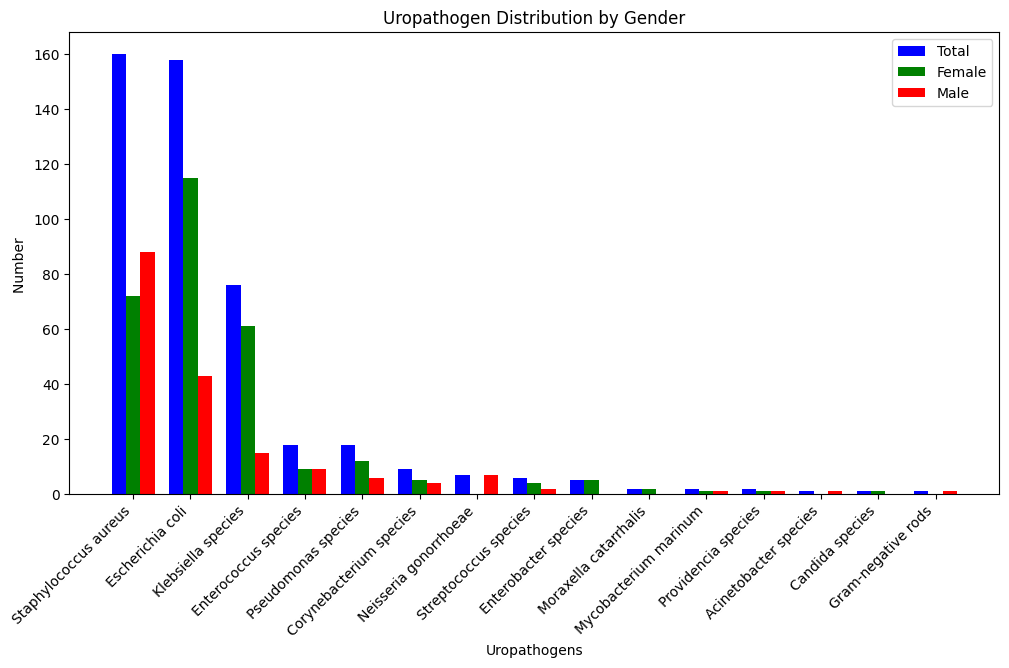

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Get the top 15 organisms
top_10_organisms = organism_counts.sort_values(by=['Total'], ascending=False)

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

# Set bar width
bar_width = 0.25

# Set positions for bars
r1 = np.arange(len(top_10_organisms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars
ax.bar(r1, top_10_organisms['Total'], color='b', width=bar_width, label='Total')
ax.bar(r2, top_10_organisms['Female'], color='g', width=bar_width, label='Female')
ax.bar(r3, top_10_organisms['Male'], color='r', width=bar_width, label='Male')

# Add labels, title, and legend
ax.set_xlabel('Uropathogens')
ax.set_ylabel('Number ')
ax.set_title('Uropathogen Distribution by Gender')
ax.set_xticks([r + bar_width for r in range(len(top_10_organisms))])
ax.set_xticklabels(top_10_organisms.index, rotation=45, ha='right')
ax.legend()

# Display the graph
plt.show()


In [57]:
# ... (your previous code to calculate organism_counts) ...

# Get the top 10 organisms' names
# Filter the original urine_data DataFrame
filtered_data = urine_data[urine_data['Organism'].isin(top_10_organisms.index)]
# Group by age group and organism and count occurrences
organism_counts_by_age_group = filtered_data.groupby(['Age Group', 'Organism'], observed=False)['Organism'].size().unstack(fill_value=0)

# ... (rest of your code) ...

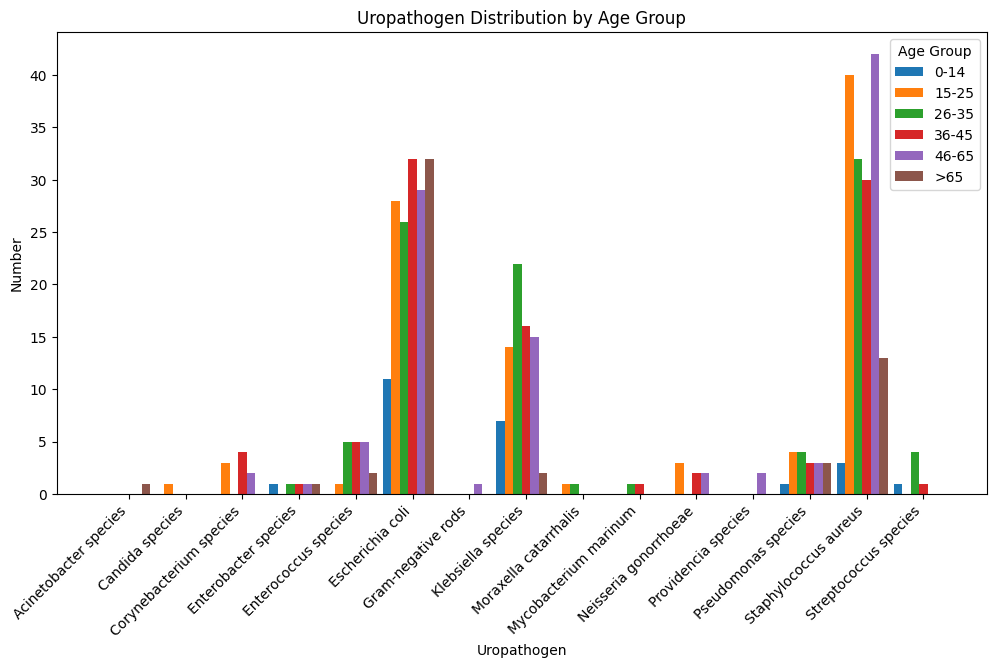

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# ... (your previous code to calculate organism_counts_by_age_group) ...

# Transpose the DataFrame for plotting (if not already transposed)
organism_counts_by_age_group = organism_counts_by_age_group.T

# Set the width of the bars
bar_width = 0.15  # Adjust as needed

# Get the positions of the bars on the x-axis
x_pos = np.arange(len(organism_counts_by_age_group.index))

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

for i, age_group in enumerate(organism_counts_by_age_group.columns):
    ax.bar(x_pos + i * bar_width, organism_counts_by_age_group[age_group], width=bar_width, label=age_group)

# Customize the chart
ax.set_xlabel('Uropathogen')
ax.set_ylabel('Number')
ax.set_title('Uropathogen Distribution by Age Group')

ax.set_xticks(x_pos + bar_width * (len(organism_counts_by_age_group.columns) / 2))  # Center the x-axis labels
ax.set_xticklabels(organism_counts_by_age_group.index, rotation=45, ha='right')
ax.legend(title='Age Group')

# Display the chart
plt.show()

In [59]:
urine_data.columns

Index(['Identification number', 'Specimen number', 'Organism', 'Country',
       'Laboratory', 'Origin', 'Last name', 'First name', 'Sex',
       'Date of Birth',
       ...
       'Cefovecin_S', 'Novobiocin_R', 'Novobiocin_S', 'Cefoxitin 10 mg_R',
       'Cefoxitin 10 mg_S', 'Pefloxacin_R', 'Pefloxacin_S', 'Norfloxacin_S',
       'Age Group', 'Culture Status'],
      dtype='object', length=156)

In [60]:
import pandas as pd

# ... (your previous code to load, process, and encode urine_data) ...

# Select columns containing antibiotic data (encoded columns)
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]  # Corrected line

# Create a dictionary to store the counts
antibiotic_counts = {}

# Iterate through antibiotic columns and count I, R, S
for column in antibiotic_columns:
    antibiotic_name = column[:-2]  # Extract antibiotic name from column name

    # Get the category (I, R, or S) from the column name
    category = column[-1]

    # Store the count in the dictionary, creating a new entry for the antibiotic if needed
    if antibiotic_name not in antibiotic_counts:
        antibiotic_counts[antibiotic_name] = {'I': 0, 'R': 0, 'S': 0}  # Initialize counts to 0

    antibiotic_counts[antibiotic_name][category] = urine_data[column].sum()
# Convert the dictionary to a DataFrame for better display
antibiotic_counts_df = pd.DataFrame(antibiotic_counts).T
antibiotic_counts_df.index.name = 'Antibiotic'
# Display the results
print(antibiotic_counts_df)

print(len(urine_data))

                             I    R    S
Antibiotic                              
Amoxicillin                  1   17   39
Amoxicillin/Clavulanic Acid  6  146   93
Amikacin                     0    1   23
Ampicillin                   2  206   29
Azithromycin                 0   71   59
Cefepime                     0    2    0
Bacitracin                   0    0    0
Ceftriaxone                  1   58  112
Cefuroxime                   0   97  146
Ciprofloxacin                9   95  130
Oxacillin                    0   28   24
Chloramphenicol              5   73  181
Cefazolin                    5   73  181
Clindamycin                  1  211  109
Gentamicin                   1   65  224
Gentaheptose                 1    0    4
Erythromycin                 7  114   32
Tetracycline                 2  292  115
Rifampicin                   0    0    0
Ofloxacin                    0    2    1
Sulfamethoxazole             3  265   43
Optochin                     0    0    0
Moxifloxacin    

In [61]:
encoded_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
for col in encoded_columns:
       urine_data[col] = urine_data[col].astype(int)  # Convert to integers if necessary
       urine_data[col] = urine_data[col].clip(0, 1)  # Clip values to be between 0 and 1

In [ ]:
#Let us remove the antibiotics that have only zeros for I, R and S from our encoded columns


In [62]:
#length of urine data
print(len(urine_data))

466


In [63]:
import pandas as pd
from google.colab import data_table

data_table.enable_dataframe_formatter()

# ... (your existing code to load and preprocess urine_data) ...

# Remove antibiotics with only zeros for I, R, and S
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
antibiotics_to_remove = []
for antibiotic_col in antibiotic_columns:
    if urine_data[antibiotic_col].sum() == 0:
        antibiotics_to_remove.append(antibiotic_col[:-2])  # Remove the suffix (_I, _R, _S)

# Filter out the columns to remove
urine_data = urine_data[[col for col in urine_data.columns if col[:-2] not in antibiotics_to_remove or not col.endswith(('_I', '_R', '_S'))]]

# ... (rest of your code to generate the susceptibility table) ...

In [64]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

import pandas as pd

# ... (your previous code to load, process, and encode urine_data) ...

# Select columns containing antibiotic data (encoded columns)
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]

# Create a dictionary to store the counts
antibiotic_counts = {}

# Iterate through antibiotic columns and count I, R, S
for column in antibiotic_columns:
    antibiotic_name = column[:-2]  # Extract antibiotic name from column name

    # Initialize counts for the antibiotic if not already present
    if antibiotic_name not in antibiotic_counts:
        antibiotic_counts[antibiotic_name] = {'Resistant': 0, 'Sensitive': 0, 'Total Culture': 0}

    # Get the category (I, R, or S) from the column name
    category = column[-1]

    # Update counts based on category
    if category in ('I', 'R'):
        antibiotic_counts[antibiotic_name]['Resistant'] += urine_data[column].sum()
    elif category == 'S':
        antibiotic_counts[antibiotic_name]['Sensitive'] += urine_data[column].sum()

    # Update Total Culture count
    antibiotic_counts[antibiotic_name]['Total Culture'] = antibiotic_counts[antibiotic_name]['Resistant'] + antibiotic_counts[antibiotic_name]['Sensitive']

# Dynamically generate antimicrobial_agents list from antibiotic_counts keys
antimicrobial_agents = list(antibiotic_counts.keys())

# Create a dictionary to store the table data
table_data = {'Antimicrobial\nAgents': antimicrobial_agents,
              'No. of Cultures Tested': [],
              'Resistant No (%)': [],
              'Sensitive No (%)': []}

# Iterate through antimicrobial agents and populate the table data
for agent in antimicrobial_agents:
    total_culture = antibiotic_counts[agent]['Total Culture']
    resistant = antibiotic_counts[agent]['Resistant']
    sensitive = antibiotic_counts[agent]['Sensitive']

    table_data['No. of Cultures Tested'].append(total_culture)
    table_data['Resistant No (%)'].append(f"{resistant} ({resistant / total_culture * 100:.1f}%)" if total_culture else '0 (0.0%)')
    table_data['Sensitive No (%)'].append(f"{sensitive} ({sensitive / total_culture * 100:.1f}%)" if total_culture else '0 (0.0%)')

# Create the DataFrame
susceptibility_table = pd.DataFrame(table_data)
#sort ascending
susceptibility_table = susceptibility_table.sort_values(by='Antimicrobial\nAgents', ascending=True)
# Display the table using data_table formatter
display(susceptibility_table)

,Antimicrobial\nAgents,No. of Cultures Tested,Resistant No (%),Sensitive No (%)
2,Amikacin,24,1 (4.2%),23 (95.8%)
0,Amoxicillin,57,18 (31.6%),39 (68.4%)
1,Amoxicillin/Clavulanic Acid,245,152 (62.0%),93 (38.0%)
3,Ampicillin,237,208 (87.8%),29 (12.2%)
22,Azlocillin,2,1 (50.0%),1 (50.0%)
21,Aztreonam,13,7 (53.8%),6 (46.2%)
17,Cefaclor,8,4 (50.0%),4 (50.0%)
7,Cefazolin,259,78 (30.1%),181 (69.9%)
23,Cefoxitin 30 mg,51,19 (37.3%),32 (62.7%)
18,Ceftazidime,75,25 (33.3%),50 (66.7%)


In [65]:
import pandas as pd
from google.colab import data_table

data_table.enable_dataframe_formatter()

# ... (your existing code to load and preprocess urine_data) ...

# Get unique organisms and antimicrobial agents
unique_organisms = urine_data['Organism'].unique()
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# Create a dictionary to store the table data (organisms as rows, antibiotics as columns)
table_data = {}

# Loop through organisms and antimicrobial agents to populate the table
for organism in unique_organisms:
    for agent in antimicrobial_agents:
        # Create keys for 'T' and 'RNo (%)' for each organism-antibiotic pair
        total_key = organism + ' T_' + agent  # Unique key for Total
        rno_key = organism + ' RNo (%)_' + agent  # Unique key for RNo (%)

        try:
            # Calculate total tested and resistant count
            total_tested = urine_data.loc[urine_data['Organism'] == organism, [agent + '_I', agent + '_R', agent + '_S']].sum().sum()
            resistant_count = urine_data.loc[urine_data['Organism'] == organism, [agent + '_I', agent + '_R']].sum().sum()

            # Store values in the table_data dictionary
            table_data[total_key] = total_tested
            table_data[rno_key] = f"{resistant_count} ({resistant_count / total_tested * 100:.1f})" if total_tested else 'ND'

        except KeyError:
            # Handle cases where the agent is not found for the current organism
            table_data[total_key] = 'ND'
            table_data[rno_key] = 'ND'

# Create the DataFrame
susceptibility_table = pd.DataFrame([table_data]).T.rename(columns={0: 'Value'})

# Split the index values safely with conditional checks
susceptibility_table['Organism'] = susceptibility_table.index.map(lambda x: x.split(' T_')[0] if ' T_' in x else x.split(' RNo (%)_')[0])
susceptibility_table['Type'] = susceptibility_table.index.map(lambda x: 'T' if ' T_' in x else 'RNo (%)')
susceptibility_table['Antibiotic'] = susceptibility_table.index.map(lambda x: x.split(' T_')[1] if ' T_' in x else x.split(' RNo (%)_')[1])

# Reshape the DataFrame to have organisms as rows
susceptibility_table = susceptibility_table.set_index(['Organism', 'Type', 'Antibiotic'])['Value'].unstack('Antibiotic')
#remove all antibiotics that have only ND values throughout
susceptibility_table = susceptibility_table.loc[:, (susceptibility_table != 'ND').any(axis=0)]
#sort ascending
susceptibility_table = susceptibility_table.sort_values(by='Organism', ascending=True)

# Display the table using data_table formatter
display(susceptibility_table)

Antibiotic                      Amoxicillin Amoxicillin/Clavulanic Acid  \
Organism                Type                                              
Acinetobacter species   RNo (%)          ND                   1 (100.0)   
                        T                 0                           1   
Candida species         RNo (%)          ND                   1 (100.0)   
                        T                 0                           1   
Corynebacterium species RNo (%)          ND                    4 (80.0)   
                        T                 0                           5   
Enterobacter species    RNo (%)          ND                   2 (100.0)   
                        T                 0                           2   
Enterococcus species    RNo (%)     0 (0.0)                    2 (22.2)   
                        T                 2                           9   
Escherichia coli        RNo (%)    7 (38.9)                   62 (76.5)   
                        T                18                          81   
Gram-negative rods      RNo (%)          ND                   1 (100.0)   
                        T                 0                           1   
Klebsiella species      T                15                          33   
                        RNo (%)    5 (33.3)                   29 (87.9)   
Moraxella catarrhalis   RNo (%)     0 (0.0)                   1 (100.0)   
                        T                 1                           1   
Mycobacterium marinum   RNo (%)          ND                   1 (100.0)   
                        T                 0                           1   
Neisseria gonorrhoeae   RNo (%)          ND                    1 (33.3)   
                        T                 0                           3   
Providencia species     RNo (%)          ND                   1 (100.0)   
                        T                 0                           1   
Pseudomonas species     RNo (%)   2 (100.0)                    3 (60.0)   
                        T                 2                           5   
Staphylococcus aureus   RNo (%)    4 (21.1)                   42 (43.3)   
                        T                19                          97   
Streptococcus species   RNo (%)          ND                    1 (25.0)   
                        T                 0                           4   

Antibiotic                       Ampicillin  Aztreonam  Cefazolin  \
Organism                Type                                        
Acinetobacter species   RNo (%)          ND         ND    0 (0.0)   
                        T                 0          0          1   
Candida species         RNo (%)   1 (100.0)         ND    0 (0.0)   
                        T                 1          0          1   
Corynebacterium species RNo (%)   8 (100.0)    0 (0.0)   1 (20.0)   
                        T                 8          2          5   
Enterobacter species    RNo (%)   3 (100.0)         ND   2 (50.0)   
                        T                 3          0          4   
Enterococcus species    RNo (%)    3 (37.5)         ND   2 (50.0)   
                        T                 8          0          4   
Escherichia coli        RNo (%)  107 (89.9)   2 (50.0)  13 (16.0)   
                        T               119          4         81   
Gram-negative rods      RNo (%)   1 (100.0)         ND    0 (0.0)   
                        T                 1          0          1   
Klebsiella species      T                57          1         41   
                        RNo (%)   55 (96.5)  1 (100.0)  14 (34.1)   
Moraxella catarrhalis   RNo (%)   2 (100.0)         ND  1 (100.0)   
                        T                 2          0          1   
Mycobacterium marinum   RNo (%)   2 (100.0)         ND   1 (50.0)   
                        T                 2          0          2   
Neisseria gonorrhoeae   RNo (%)   1 (100.0)         ND   1 (33.3)   
            

In [354]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
#export the dataframe to csv
susceptibility_table.to_csv('/content/drive/My Drive/susceptibility_table.csv', index=True)
df_verify = pd.read_csv('/content/drive/My Drive/susceptibility_table.csv')
#print(df_verify)


In [66]:
import pandas as pd
from google.colab import data_table

data_table.enable_dataframe_formatter()

# ... (your existing code to load and preprocess urine_data) ...

# Get unique organisms and antimicrobial agents
unique_organisms = urine_data['Organism'].unique()
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# Create a dictionary to store the table data
table_data = {'Bacterial Isolates': [], 'R0 No (%)': [], 'R1 No (%)': [], 'R2 No (%)': [],
              'R3 No (%)': [], 'R4 No (%)': [], 'R5 No (%)': [], 'R6 No (%)': [], '>R7 No (%)': []}

# Iterate through unique organisms
for organism in unique_organisms:
    # Get organism count, handling potential KeyError
    organism_count = urine_data['Organism'].value_counts().get(organism, 0)

    table_data['Bacterial Isolates'].append(f"{organism} ({organism_count})")

    # Count resistance levels for the organism
    resistance_counts = [0] * 8  # Initialize counts for R0 to >R7

    for _, row in urine_data[urine_data['Organism'] == organism].iterrows():
        resistance_level = 0
        for agent in antimicrobial_agents:
            # Check if antibiotic columns exist for this organism before accessing them
            if agent + '_I' in row and agent + '_R' in row:
                if row[agent + '_I'] == 1 or row[agent + '_R'] == 1:
                    resistance_level += 1

        if resistance_level <= 6:
            resistance_counts[resistance_level] += 1
        else:
            resistance_counts[7] += 1  # Count for >R7

    # Calculate percentages and format for the table
    total_isolates = urine_data['Organism'].value_counts().get(organism, 0)  # Handle KeyError
    for i in range(len(resistance_counts)):
        percentage = (resistance_counts[i] / total_isolates) * 100 if total_isolates else 0
        table_data[f"R{i} No (%)" if i <= 6 else ">R7 No (%)"].append(f"{resistance_counts[i]} ({percentage:.1f})")

# Create the DataFrame
multi_drug_resistance_table = pd.DataFrame(table_data)

# Display the table using data_table formatter
display(multi_drug_resistance_table)

,Bacterial Isolates,R0 No (%),R1 No (%),R2 No (%),R3 No (%),R4 No (%),R5 No (%),R6 No (%),>R7 No (%)
0,Escherichia coli (158),3 (1.9),15 (9.5),15 (9.5),35 (22.2),43 (27.2),26 (16.5),11 (7.0),10 (6.3)
1,Staphylococcus aureus (160),2 (1.2),13 (8.1),22 (13.8),24 (15.0),35 (21.9),24 (15.0),16 (10.0),24 (15.0)
2,Klebsiella species (76),2 (2.6),1 (1.3),12 (15.8),17 (22.4),17 (22.4),10 (13.2),4 (5.3),13 (17.1)
3,Enterococcus species (18),0 (0.0),2 (11.1),3 (16.7),7 (38.9),1 (5.6),4 (22.2),1 (5.6),0 (0.0)
4,Streptococcus species (6),0 (0.0),1 (16.7),1 (16.7),1 (16.7),0 (0.0),2 (33.3),0 (0.0),1 (16.7)
5,Pseudomonas species (18),2 (11.1),0 (0.0),2 (11.1),5 (27.8),2 (11.1),4 (22.2),0 (0.0),3 (16.7)
6,Moraxella catarrhalis (2),0 (0.0),0 (0.0),0 (0.0),0 (0.0),1 (50.0),0 (0.0),0 (0.0),1 (50.0)
7,Corynebacterium species (9),0 (0.0),0 (0.0),2 (22.2),2 (22.2),2 (22.2),1 (11.1),1 (11.1),1 (11.1)
8,Enterobacter species (5),0 (0.0),1 (20.0),1 (20.0),1 (20.0),0 (0.0),0 (0.0),2 (40.0),0 (0.0)
9,Candida species (1),0 (0.0),0 (0.0),0 (0.0),0 (0.0),0 (0.0),1 (100.0),0 (0.0),0 (0.0)


In [67]:
import pandas as pd
from google.colab import data_table

data_table.enable_dataframe_formatter()

# ... (your existing code to load and preprocess urine_data) ...

# Get unique organisms and antimicrobial agents
unique_organisms = urine_data['Organism'].unique()
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# Create a dictionary to store the table data
table_data = {'Bacterial Isolates': [], 'R0 No (%)': [], 'R1 No (%)': [], 'R2 No (%)': [],
              'R3 No (%)': [], 'R4 No (%)': [], 'R5 No (%)': [], 'R6 No (%)': [], '>R7 No (%)': []}

# Iterate through unique organisms
for organism in unique_organisms:
    # Get organism count, handling potential KeyError
    organism_count = urine_data['Organism'].value_counts().get(organism, 0)

    table_data['Bacterial Isolates'].append(f"{organism} ({organism_count})")

    # Calculate resistance counts for each category directly
    resistance_counts = [0] * 8  # Initialize counts for R0 to >R7

    for i in range(len(resistance_counts)):
        # Calculate count for current resistance level (R0 to >R7)
        count = 0
        for _, row in urine_data[urine_data['Organism'] == organism].iterrows():
            resistance_level = 0
            for agent in antimicrobial_agents:
                if agent + '_I' in row and agent + '_R' in row:
                    if row[agent + '_I'] == 1 or row[agent + '_R'] == 1:
                        resistance_level += 1

            if resistance_level == i:  # Check if resistance level matches current category
                count += 1
            elif resistance_level > 6 and i == 7: # For >R7 category
                count += 1

        resistance_counts[i] = count

    # Calculate percentages and format for the table
    total_isolates = urine_data['Organism'].value_counts().get(organism, 0)  # Handle KeyError
    for i in range(len(resistance_counts)):
        percentage = (resistance_counts[i] / total_isolates) * 100 if total_isolates else 0
        table_data[f"R{i} No (%)" if i <= 6 else ">R7 No (%)"].append(f"{resistance_counts[i]} ({percentage:.1f}%)")

# Create the DataFrame
multi_drug_resistance_table = pd.DataFrame(table_data)

# Display the table using data_table formatter
display(multi_drug_resistance_table)

,Bacterial Isolates,R0 No (%),R1 No (%),R2 No (%),R3 No (%),R4 No (%),R5 No (%),R6 No (%),>R7 No (%)
0,Escherichia coli (158),3 (1.9%),15 (9.5%),15 (9.5%),35 (22.2%),43 (27.2%),26 (16.5%),11 (7.0%),10 (6.3%)
1,Staphylococcus aureus (160),2 (1.2%),13 (8.1%),22 (13.8%),24 (15.0%),35 (21.9%),24 (15.0%),16 (10.0%),24 (15.0%)
2,Klebsiella species (76),2 (2.6%),1 (1.3%),12 (15.8%),17 (22.4%),17 (22.4%),10 (13.2%),4 (5.3%),13 (17.1%)
3,Enterococcus species (18),0 (0.0%),2 (11.1%),3 (16.7%),7 (38.9%),1 (5.6%),4 (22.2%),1 (5.6%),0 (0.0%)
4,Streptococcus species (6),0 (0.0%),1 (16.7%),1 (16.7%),1 (16.7%),0 (0.0%),2 (33.3%),0 (0.0%),1 (16.7%)
5,Pseudomonas species (18),2 (11.1%),0 (0.0%),2 (11.1%),5 (27.8%),2 (11.1%),4 (22.2%),0 (0.0%),3 (16.7%)
6,Moraxella catarrhalis (2),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),1 (50.0%),0 (0.0%),0 (0.0%),1 (50.0%)
7,Corynebacterium species (9),0 (0.0%),0 (0.0%),2 (22.2%),2 (22.2%),2 (22.2%),1 (11.1%),1 (11.1%),1 (11.1%)
8,Enterobacter species (5),0 (0.0%),1 (20.0%),1 (20.0%),1 (20.0%),0 (0.0%),0 (0.0%),2 (40.0%),0 (0.0%)
9,Candida species (1),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),1 (100.0%),0 (0.0%),0 (0.0%)


In [65]:
from datetime import date
print(urine_data['Specimen date'])



209    2021-12-31
236    2021-12-20
244    2021-12-17
261    2021-12-15
276    2021-12-14
          ...    
4417   2020-01-13
4427   2020-01-09
4436   2020-01-09
4438   2020-01-09
4454   2020-01-06
Name: Specimen date, Length: 466, dtype: datetime64[ns]


In [68]:
# Ensure 'Specimen date' column is in datetime format
urine_data['Specimen date'] = pd.to_datetime(urine_data['Specimen date'], errors='coerce')

# Now, extract the year from the 'Specimen date' column
urine_data['Year'] = urine_data['Specimen date'].dt.year

# Check the first few rows to ensure the conversion worked
print(urine_data[['Specimen date', 'Year']].head())


    Specimen date  Year
209    2021-12-31  2021
236    2021-12-20  2021
244    2021-12-17  2021
261    2021-12-15  2021
276    2021-12-14  2021


In [69]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of antimicrobial agents (without '_I' and '_R' suffixes)
antimicrobial_agents = list(set([col[:-2] for col in urine_data.columns if col.endswith('_I') or col.endswith('_R')]))

# Check and print columns to confirm presence of antibiotic-related columns
print("Columns in the dataset:", urine_data.columns)

# Initialize an empty DataFrame to store the result
result_data = pd.DataFrame()

# Step 4: Iterate through all organism-year combinations and calculate resistance counts
for organism in unique_organisms:
    # Initialize a list to store resistance counts over the years for Chi-square test
    resistance_over_years = []

    for year in urine_data['Year'].unique():
        # Filter data for the given organism and year
        year_data = urine_data[(urine_data['Year'] == year) & (urine_data['Organism'] == organism)]

        organism_count = year_data.shape[0]  # Get the total count of the organism in that year

        # Initialize counts for resistance levels and MDR
        resistance_counts = [0] * 8  # Initialize counts for R0 to >R7
        mdr_count = 0  # MDR is defined as resistance to ≥3 antibiotics

        if organism_count == 0:
            # If no data for this organism-year combination, append default values (0%)
            new_row = pd.DataFrame([{
                'Organism': organism, 'Year': year, 'Bacterial Isolates': 0,
                'R0 No (%)': '0 (0%)', 'R1 No (%)': '0 (0%)', 'R2 No (%)': '0 (0%)',
                'R3 No (%)': '0 (0%)', 'R4 No (%)': '0 (0%)', 'R5 No (%)': '0 (0%)',
                'R6 No (%)': '0 (0%)', 'R7 No (%)': '0 (0%)', '>R7 No (%)': '0 (0%)', 'MDR No (%)': '0 (0%)',
                'p-value': 'N/A'  # No p-value available for empty data
            }])
        else:
            # Loop through the data for the current organism
            for _, row in year_data.iterrows():
                resistance_level = 0

                # Check resistance level for each antibiotic
                for agent in antimicrobial_agents:
                    if f'{agent}_I' in row and f'{agent}_R' in row:
                        # If either '_I' or '_R' column exists, check resistance
                        if row[f'{agent}_I'] == 1 or row[f'{agent}_R'] == 1:
                            resistance_level += 1

                # Increment count based on resistance level
                if resistance_level >= 3:
                    mdr_count += 1  # Count as MDR if resistance to 3 or more antibiotics
                if resistance_level == 0:
                    resistance_counts[0] += 1
                elif resistance_level == 1:
                    resistance_counts[1] += 1
                elif resistance_level == 2:
                    resistance_counts[2] += 1
                elif resistance_level == 3:
                    resistance_counts[3] += 1
                elif resistance_level == 4:
                    resistance_counts[4] += 1
                elif resistance_level == 5:
                    resistance_counts[5] += 1
                elif resistance_level == 6:
                    resistance_counts[6] += 1
                elif resistance_level > 6:
                    resistance_counts[7] += 1

            # Calculate percentages for resistance levels
            total_isolates = organism_count
            resistance_percentages = {
                'R0 No (%)': f"{resistance_counts[0]} ({(resistance_counts[0] / total_isolates) * 100:.1f}%)",
                'R1 No (%)': f"{resistance_counts[1]} ({(resistance_counts[1] / total_isolates) * 100:.1f}%)",
                'R2 No (%)': f"{resistance_counts[2]} ({(resistance_counts[2] / total_isolates) * 100:.1f}%)",
                'R3 No (%)': f"{resistance_counts[3]} ({(resistance_counts[3] / total_isolates) * 100:.1f}%)",
                'R4 No (%)': f"{resistance_counts[4]} ({(resistance_counts[4] / total_isolates) * 100:.1f}%)",
                'R5 No (%)': f"{resistance_counts[5]} ({(resistance_counts[5] / total_isolates) * 100:.1f}%)",
                'R6 No (%)': f"{resistance_counts[6]} ({(resistance_counts[6] / total_isolates) * 100:.1f}%)",
                'R7 No (%)': f"{resistance_counts[7]} ({(resistance_counts[7] / total_isolates) * 100:.1f}%)",
                #'Greater than R7 No (%)': f"0 (0%)",  # Default value for >R7
                'MDR No (%)': f"{mdr_count} ({(mdr_count / total_isolates) * 100:.1f}%)"
            }

            # Append the resistance counts for this year to the list for the Chi-square test
            resistance_over_years.append(resistance_counts)

            # Store the results for this organism-year combination
            new_row = pd.DataFrame([{
                'Organism': organism, 'Year': year, 'Bacterial Isolates': organism_count,
                **resistance_percentages
            }])

        # Concatenate the new row to the result_data DataFrame
        result_data = pd.concat([result_data, new_row], ignore_index=True)

    # After looping through all years for this organism, perform the Chi-square test
    if len(resistance_over_years) > 1:
        # Ensure that no zero values are in the contingency table for the Chi-Square test
        resistance_over_years = [[max(count, 1) for count in year_counts] for year_counts in resistance_over_years]

        # Perform Chi-Square Test for Trend
        chi2, p_value, _, _ = chi2_contingency(resistance_over_years)

        # Append p-value to the last row for this organism
        #two decimal places
        result_data.loc[result_data['Organism'] == organism, 'p-value'] = f"{p_value:.4f}"

        #result_data.loc[result_data['Organism'] == organism, 'p-value'] = p_value

# Display the result table
display(result_data)


Columns in the dataset: Index(['Identification number', 'Specimen number', 'Organism', 'Country',
       'Laboratory', 'Origin', 'Last name', 'First name', 'Sex',
       'Date of Birth',
       ...
       'Cefoxitin 30 mg_R', 'Cefoxitin 30 mg_S', 'Meropenem_I', 'Meropenem_R',
       'Meropenem_S', 'Novobiocin_R', 'Novobiocin_S', 'Age Group',
       'Culture Status', 'Year'],
      dtype='object', length=104)


,Organism,Year,Bacterial Isolates,R0 No (%),R1 No (%),R2 No (%),R3 No (%),R4 No (%),R5 No (%),R6 No (%),R7 No (%),MDR No (%),p-value,>R7 No (%)
0,Escherichia coli,2021,116,3 (2.6%),9 (7.8%),13 (11.2%),30 (25.9%),34 (29.3%),20 (17.2%),6 (5.2%),1 (0.9%),91 (78.4%),0.0002,NaN
1,Escherichia coli,2020,42,0 (0.0%),6 (14.3%),2 (4.8%),5 (11.9%),9 (21.4%),6 (14.3%),5 (11.9%),9 (21.4%),34 (81.0%),0.0002,NaN
2,Staphylococcus aureus,2021,97,2 (2.1%),7 (7.2%),15 (15.5%),15 (15.5%),26 (26.8%),16 (16.5%),10 (10.3%),6 (6.2%),73 (75.3%),0.0196,NaN
3,Staphylococcus aureus,2020,63,0 (0.0%),6 (9.5%),7 (11.1%),9 (14.3%),9 (14.3%),8 (12.7%),6 (9.5%),18 (28.6%),50 (79.4%),0.0196,NaN
4,Klebsiella species,2021,50,1 (2.0%),1 (2.0%),10 (20.0%),13 (26.0%),11 (22.0%),9 (18.0%),1 (2.0%),4 (8.0%),38 (76.0%),0.0313,NaN
5,Klebsiella species,2020,26,1 (3.8%),0 (0.0%),2 (7.7%),4 (15.4%),6 (23.1%),1 (3.8%),3 (11.5%),9 (34.6%),23 (88.5%),0.0313,NaN
6,Enterococcus species,2021,18,0 (0.0%),2 (11.1%),3 (16.7%),7 (38.9%),1 (5.6%),4 (22.2%),1 (5.6%),0 (0.0%),13 (72.2%),NaN,NaN
7,Enterococcus species,2020,0,0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),N/A,0 (0%)
8,Streptococcus species,2021,4,0 (0.0%),1 (25.0%),1 (25.0%),1 (25.0%),0 (0.0%),1 (25.0%),0 (0.0%),0 (0.0%),2 (50.0%),1.0000,NaN
9,Streptococcus species,2020,2,0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),1 (50.0%),0 (0.0%),1 (50.0%),2 (100.0%),1.0000,NaN


In [73]:
urine_data.head()

,Identification number,Specimen number,Organism,Country,Laboratory,Origin,Last name,First name,Sex,Date of Birth,...,Cefoxitin 30 mg_R,Cefoxitin 30 mg_S,Meropenem_I,Meropenem_R,Meropenem_S,Novobiocin_R,Novobiocin_S,Age Group,Culture Status,Year
209,O-1835,NaN,Escherichia coli,UGA,DMM,h,MARGERETI,KENTANURE,F,NaN,...,0,1,0,0,0,0,0,>65,No Significant Growth,2021
236,O-1809,NaN,Staphylococcus aureus,UGA,DMM,h,GEOFREY,MUSHUMBUSHA,M,NaN,...,0,0,0,0,0,0,0,46-65,Negative,2021
244,O-1798,NaN,Klebsiella species,UGA,DMM,h,FAITH,MUJUNE,F,NaN,...,0,0,0,0,0,0,0,26-35,Positive,2021
261,O-1782,NaN,Staphylococcus aureus,UGA,DMM,h,MELISA,NIMUSIMA,F,NaN,...,0,0,0,0,0,0,0,15-25,No Significant Growth,2021
276,O-1780,NaN,Staphylococcus aureus,UGA,DMM,h,GIFT,AGABIRWE,F,NaN,...,0,0,0,0,0,0,0,36-45,No Significant Growth,2021


In [83]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from google.colab import data_table

# Enable DataFrame formatter for Google Colab (optional)
data_table.enable_dataframe_formatter()

# Assuming `urine_data` is preloaded with the appropriate data.

# 1. Ensure 'Specimen date' is in datetime format and extract the year
urine_data['Specimen date'] = pd.to_datetime(urine_data['Specimen date'], errors='coerce')
urine_data['Year'] = urine_data['Specimen date'].dt.year

# 2. Get unique organisms and antimicrobial agents
unique_organisms = urine_data['Organism'].unique()
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# 3. Initialize a dictionary to store results for antibiotic resistance analysis
results = {}

# 4. Iterate through organisms, antibiotics, and years to calculate resistance patterns
for organism in unique_organisms:
    results[organism] = {}

    for agent in antimicrobial_agents:
        results[organism][agent] = {'years': [], 'resistance_percentages': [], 'total_counts': []}

        for year in urine_data['Year'].unique():
            year_data = urine_data[(urine_data['Year'] == year) & (urine_data['Organism'] == organism)]

            # Calculate individual antibiotic resistance count
            resistant_count = year_data[f'{agent}_R'].sum() if f'{agent}_R' in year_data else 0
            total_count = year_data.shape[0]  # Total isolates for this organism in this year

            # Calculate resistance percentage
            resistance_percentage = (resistant_count / total_count) * 100 if total_count > 0 else 0

            results[organism][agent]['years'].append(year)
            results[organism][agent]['resistance_percentages'].append(resistance_percentage)
            results[organism][agent]['total_counts'].append(total_count)

# 5. Perform Chi-square test and store p-values
for organism, agent_data in results.items():
    for agent, data in agent_data.items():
        if len(data['years']) > 1:  # Check if data exists for more than one year
            # Create contingency table (adjusting for zero values)
            contingency_table = [
                [resistant_count, total_count - resistant_count]
                for resistant_count, total_count in zip(data['resistance_percentages'], data['total_counts'])
            ]
            contingency_table = [[max(val, 0.5) for val in row] for row in contingency_table]

            # Perform Chi-square test
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            results[organism][agent]['p_value'] = p_value

# 6. Create and display the result table (including resistance percentages per year)
resistance_result_table_data = []
for organism, agent_data in results.items():
    for agent, data in agent_data.items():
        p_value = data.get('p_value', None)  # Get p-value, or None if not calculated
        if p_value is not None and p_value < 0.05:  # Check for significance
            # Prepare the dictionary for each row of the table
            result_row = {
                'Organism': organism,
                'Antibiotic': agent,
                'P-value': p_value
            }

            # Add resistance percentages per year as columns
            for year, resistance_percentage in zip(data['years'], data['resistance_percentages']):
                result_row[f'Resistance Percentage ({year})'] = round(resistance_percentage, 2)

            resistance_result_table_data.append(result_row)

# Create DataFrame for the result table
resistance_result_table = pd.DataFrame(resistance_result_table_data)

# Display the result table
display(resistance_result_table)


,Organism,Antibiotic,P-value,Resistance Percentage (2021),Resistance Percentage (2020)
0,Escherichia coli,Gentamicin,1.957822e-14,6.03,26.19
1,Escherichia coli,Ciprofloxacin,5.799969e-09,20.69,28.57
2,Escherichia coli,Chloramphenicol,1.652835e-04,6.03,11.90
3,Escherichia coli,Cefoxitin 30 mg,7.158866e-03,0.86,4.76
4,Escherichia coli,Ampicillin,1.033850e-08,68.10,64.29
...,...,...,...,...,...
73,Mycobacterium marinum,Chloramphenicol,1.090748e-03,0.00,100.00
74,Mycobacterium marinum,Cefazolin,1.090748e-03,0.00,100.00
75,Mycobacterium marinum,Amoxicillin/Clavulanic Acid,1.090748e-03,0.00,100.00
76,Mycobacterium marinum,Sulfamethoxazole,1.090748e-03,100.00,0.00


In [88]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from google.colab import data_table

# Enable DataFrame formatter for Google Colab (optional)
data_table.enable_dataframe_formatter()

# Assuming `urine_data` is preloaded with the appropriate data.

# 1. Ensure 'Specimen date' is in datetime format and extract the year
urine_data['Specimen date'] = pd.to_datetime(urine_data['Specimen date'], errors='coerce')
urine_data['Year'] = urine_data['Specimen date'].dt.year

# 2. Get unique organisms and antimicrobial agents
unique_organisms = urine_data['Organism'].unique()
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# 3. Initialize a dictionary to store results for antibiotic resistance analysis
results = {}

# 4. Iterate through organisms, antibiotics, and years to calculate resistance patterns
for organism in unique_organisms:
    results[organism] = {}

    for agent in antimicrobial_agents:
        results[organism][agent] = {'years': [], 'resistance_percentages': [], 'resistance_counts': [], 'total_counts': []}

        for year in urine_data['Year'].unique():
            year_data = urine_data[(urine_data['Year'] == year) & (urine_data['Organism'] == organism)]

            # Calculate individual antibiotic resistance counts for R, I, and S
            resistant_count = year_data[f'{agent}_R'].sum() if f'{agent}_R' in year_data else 0
            intermediate_count = year_data[f'{agent}_I'].sum() if f'{agent}_I' in year_data else 0
            susceptible_count = year_data[f'{agent}_S'].sum() if f'{agent}_S' in year_data else 0
            total_count = year_data.shape[0]  # Total isolates for this organism in this year

            # Calculate resistance proportion: (R+I) / (R+I+S) * 100
            resistance_percentage = (resistant_count + intermediate_count) / (resistant_count + intermediate_count + susceptible_count) * 100 if total_count > 0 else 0

            results[organism][agent]['years'].append(year)
            results[organism][agent]['resistance_percentages'].append(resistance_percentage)
            results[organism][agent]['resistance_counts'].append((resistant_count, intermediate_count))
            results[organism][agent]['total_counts'].append(total_count)

# 5. Perform Chi-square test and store p-values
for organism, agent_data in results.items():
    for agent, data in agent_data.items():
        if len(data['years']) > 1:  # Check if data exists for more than one year
            # Create contingency table (adjusting for zero values)
            contingency_table = [
                [data['resistance_counts'][i][0] + data['resistance_counts'][i][1],
                 total - (data['resistance_counts'][i][0] + data['resistance_counts'][i][1])]  # (R + I, S)
                for i, total in enumerate(data['total_counts'])
            ]
            contingency_table = [[max(val, 0.5) for val in row] for row in contingency_table]

            # Perform Chi-square test
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            results[organism][agent]['p_value'] = p_value

# 6. Create and display the result table (filtering for significant p-values)
resistance_result_table_data = []
for organism, agent_data in results.items():
    for agent, data in agent_data.items():
        p_value = data.get('p_value', None)  # Get p-value, or None if not calculated
        if p_value is not None and p_value < 0.05:  # Check for significance
            resistance_result_table_data.append({
                'Organism': organism,
                'Antibiotic': agent,
                'P-value': f'{p_value:.5f}',
                'Resistance Percentage (2021)': f'{data["resistance_percentages"][-1]:.2f}',  # Last year's value (2021)
                'Resistance Percentage (2020)': f'{data["resistance_percentages"][0]:.2f}',  # First year's value (2020)
            })

resistance_result_table = pd.DataFrame(resistance_result_table_data)
display(resistance_result_table)


<ipython-input-88-e2f2f83d1c13>:40: RuntimeWarning: invalid value encountered in scalar divide
  resistance_percentage = (resistant_count + intermediate_count) / (resistant_count + intermediate_count + susceptible_count) * 100 if total_count > 0 else 0


,Organism,Antibiotic,P-value,Resistance Percentage (2021),Resistance Percentage (2020)
0,Escherichia coli,Gentamicin,0.00120,31.43,9.86
1,Escherichia coli,Amoxicillin/Clavulanic Acid,0.00022,81.82,72.92
2,Escherichia coli,Ceftriaxone,0.01376,55.56,26.47
3,Staphylococcus aureus,Gentamicin,0.00005,43.48,11.32
4,Staphylococcus aureus,Chloramphenicol,0.03524,36.21,43.59
5,Staphylococcus aureus,Cefoxitin 30 mg,0.00546,47.06,33.33
6,Staphylococcus aureus,Cefazolin,0.03524,36.21,43.59
7,Staphylococcus aureus,Ceftazidime,0.02039,45.00,21.43
8,Staphylococcus aureus,Sulfamethoxazole,0.03675,90.00,94.55
9,Klebsiella species,Chloramphenicol,0.00037,47.83,16.67


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#export the dataframe to csv
susceptibility_table.to_csv('/content/drive/My Drive/susceptibility_table.csv', index=True)
df_verify = pd.read_csv('/content/drive/My Drive/susceptibility_table.csv')
#print(df_verify)
#export multiple drug resistance table
multi_drug_resistance_table.to_csv('/content/drive/My Drive/multi_drug_resistance_table.csv', index=True)
df_verify = pd.read_csv('/content/drive/My Drive/multi_drug_resistance_table.csv')
#export susceptibility_table
susceptibility_table.to_csv('/content/drive/My Drive/susceptibility_table.csv', index=True)
df_verify = pd.read_csv('/content/drive/My Drive/susceptibility_table.csv')
#print(df_verify)


In [68]:
import pandas as pd

# Assuming your data is in a DataFrame called 'urine_data' with an 'Organism' column
# and you have the organism_replacements dictionary as defined previously

gram_positive_count = 0
gram_negative_count = 0

for organism in urine_data['Organism']:
    full_name = organism_replacements.get(organism, organism)  # Get full name or keep original if not found
    if any(bacteria_type in full_name for bacteria_type in ['Staphylococcus', 'Streptococcus', 'Bacillus', 'Corynebacterium', 'Clostridium', 'Enterococcus']):
        gram_positive_count += 1
    elif any(bacteria_type in full_name for bacteria_type in ['Escherichia', 'Klebsiella', 'Pseudomonas', 'Salmonella', 'Shigella', 'Neisseria', 'Proteus', 'Enterobacter', 'Acinetobacter', 'Serratia', 'Citrobacter', 'Morganella']):
        gram_negative_count += 1
total_bacteria = gram_positive_count + gram_negative_count

gram_positive_percentage = (gram_positive_count / total_bacteria) * 100 if total_bacteria else 0
gram_negative_percentage = (gram_negative_count / total_bacteria) * 100 if total_bacteria else 0

print(f"Gram-positive bacteria: {gram_positive_percentage:.2f}%")
print(f"Gram-negative bacteria: {gram_negative_percentage:.2f}%")

Gram-positive bacteria: 42.14%
Gram-negative bacteria: 57.86%
